# Explore here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Exploratory Data Analysis ##
### First Steps ###
* Inspect the dimensions, colummns shape, data type, description, and  summary statistics of the dataset.
* Begin by searching through the dataset for missing values and NaNas. 
* If practical (or useful) perform some data imputation of missing values.
* Extract some of the features and look for correlations that and patterns and perform some visulizations.

In [5]:
# Shape
df.shape # The dataframe fas 48,895 rows and 16 columns.

(48895, 16)

In [7]:
# Data types
df.dtypes # The dataframe has 6 columns with float64 data type, 3 columns with int64 data type and 7 columns with object data type.

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
# Describe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [12]:
# Missing values
missing_values = df.isnull().sum()
missing_values # The dataframe has 4 columns with missing values: 'name', 'host_name', 'last_review' and 'reviews_per_month'.


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
(df.isnull().sum() / df.shape[0])*100 # The columns with missing values are: 'name' (0.000327), 'host_name' (0.000041), 'last_review' (0.205583) and 'reviews_per_month' (0.205583).
# The values have been normalized to show the fpercentage of missing values in each column.

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

<p>This preliminary view of the data shows that only two columns contain a meaningful percentace of null values. Becauuse I consider the reviews to be a meaningful parameter to explore I decided not to drop the columns. Some quesitons to consider:
<ul>
<li>How Does the location of the Airbnb correlated with the listed values ?</li>
<li>How is the price correlated with the number of nights the tenats stay ?</li>
<li>Does the room type matter in the minimum number of stays ?</li>
<li>What different room types are present in different burrougs?</li>
<li>Which room type get rented out the most in each burrough ?</li>



<p/>


<Figure size 2000x500 with 0 Axes>

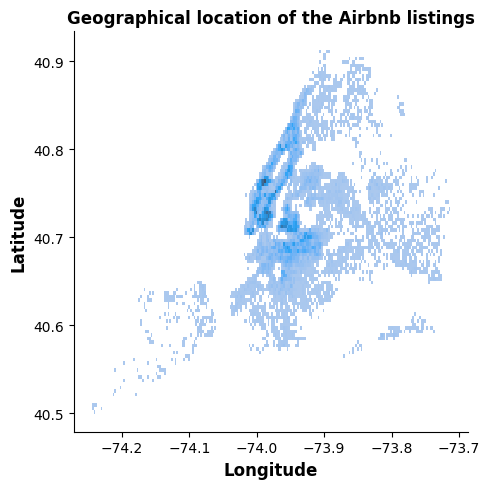

In [28]:
# Lets viusalize how the geographical location affect the prices.
plt.figure(figsize=(20,5))
sns.displot(data=df,x="longitude",y="latitude")
plt.title("Geographical location of the Airbnb listings",fontweight='bold')
plt.xlabel("Longitude", fontsize=12,fontweight='bold')
plt.ylabel("Latitude", fontsize=12,fontweight='bold')
plt.tight_layout()
plt.show()




The Figure above shows the density of locations of Airbnbs in the State of New York per. We can clearly see that the highest density is towards the center of the plot, specifically in the area of Manhattahn. The outskirkts of the state have a lower density of rentals.

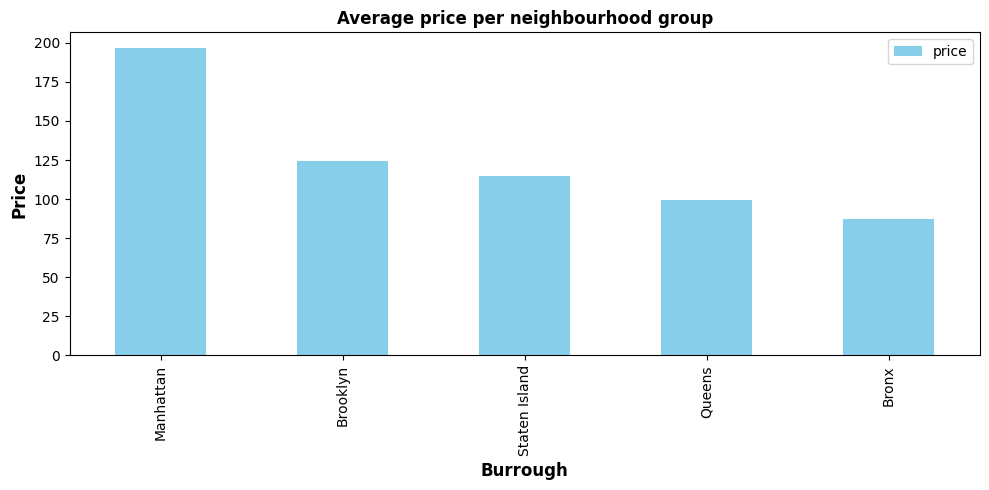

In [35]:
df[['neighbourhood_group','price']].groupby('neighbourhood_group').mean().sort_values('price',ascending=False).plot(kind='bar',figsize=(10,5),color='skyblue')
plt.title("Average price per neighbourhood group",fontweight='bold')
plt.ylabel("Price", fontsize=12,fontweight='bold')
plt.xlabel("Burrough", fontsize=12,fontweight='bold')
plt.tight_layout()
plt.show()
# The graph shows that the neighbourhood group with the highest average price is Manhattan, followed by Brooklyn, Staten Island, Queens and The Bronx.

#### Let's now look at the Burroughs independetly. The Barchart above shows that Manhattan has the highest average price of all the Burroughs. Before we also observed that they had the highest density of rentals. But what is the distribution of these prices and how do they correlate with quantities like room types and number of rentals and so forth.
###

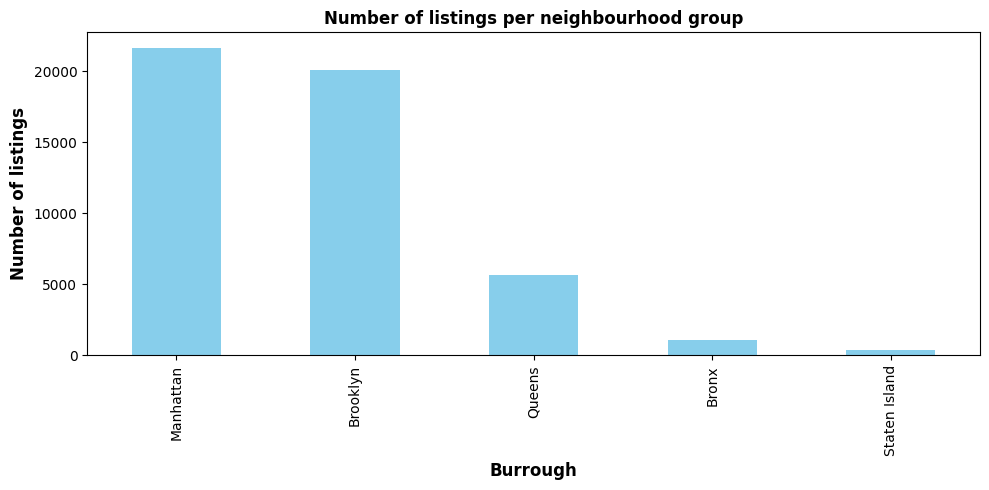

In [37]:
df['neighbourhood_group'].value_counts().plot(kind='bar',figsize=(10,5),color='skyblue')
plt.title("Number of listings per neighbourhood group",fontweight='bold')
plt.ylabel("Number of listings", fontsize=12,fontweight='bold')
plt.xlabel("Burrough", fontsize=12,fontweight='bold')
plt.tight_layout()
plt.show()

### The graph shows the distribution of the number of listings. This correlates well with our initial map of the state ###

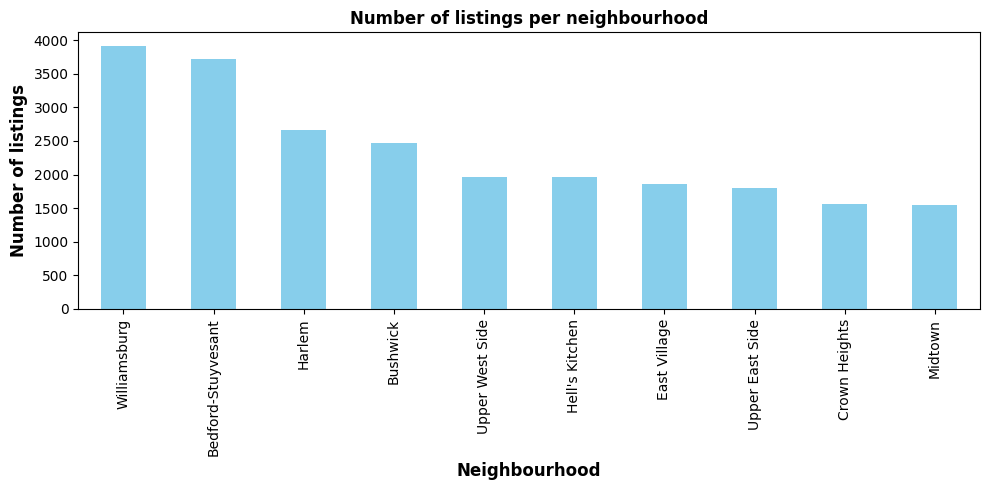

In [39]:
df['neighbourhood'].value_counts().head(10).plot(kind='bar',figsize=(10,5),color='skyblue')
plt.title("Number of listings per neighbourhood",fontweight='bold')
plt.ylabel("Number of listings", fontsize=12,fontweight='bold')
plt.xlabel("Neighbourhood", fontsize=12,fontweight='bold')
plt.tight_layout()
plt.show()

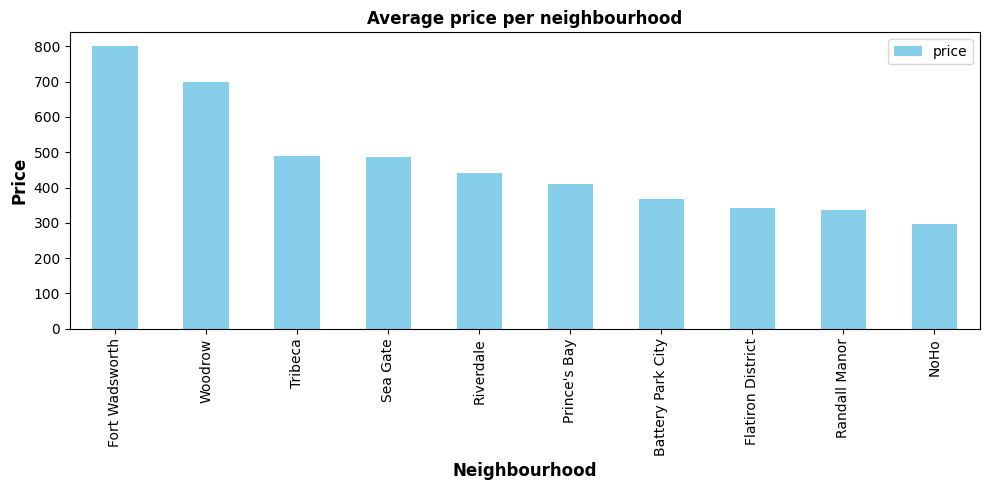

In [41]:
df[['neighbourhood','price']].groupby('neighbourhood').mean().sort_values('price',ascending=False).head(10).plot(kind='bar',figsize=(10,5),color='skyblue')
plt.title("Average price per neighbourhood",fontweight='bold')
plt.ylabel("Price", fontsize=12,fontweight='bold')
plt.xlabel("Neighbourhood", fontsize=12,fontweight='bold')
plt.tight_layout()
plt.show()

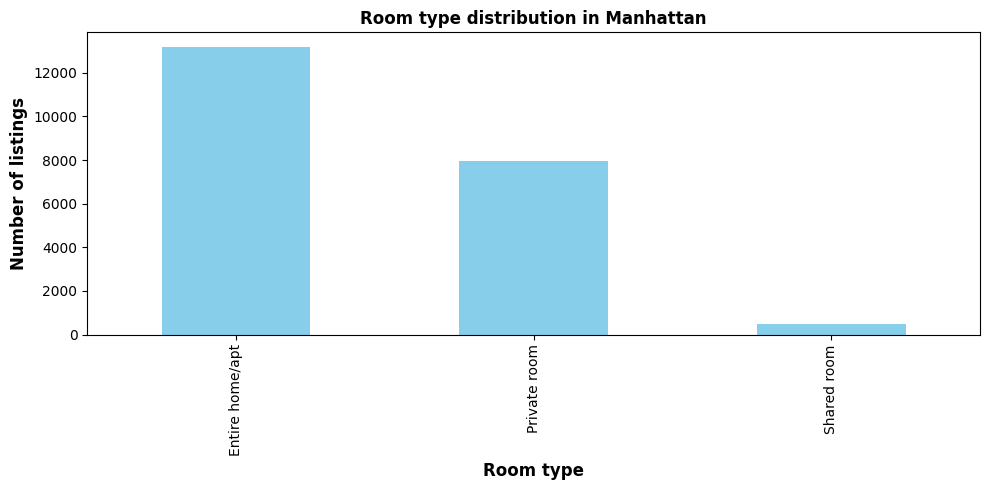

In [43]:
df[df['neighbourhood_group']== 'Manhattan']['room_type'].value_counts().plot(kind='bar',figsize=(10,5),color='skyblue')
plt.title("Room type distribution in Manhattan",fontweight='bold')
plt.ylabel("Number of listings", fontsize=12,fontweight='bold')
plt.xlabel("Room type", fontsize=12,fontweight='bold')
plt.tight_layout()
plt.show()

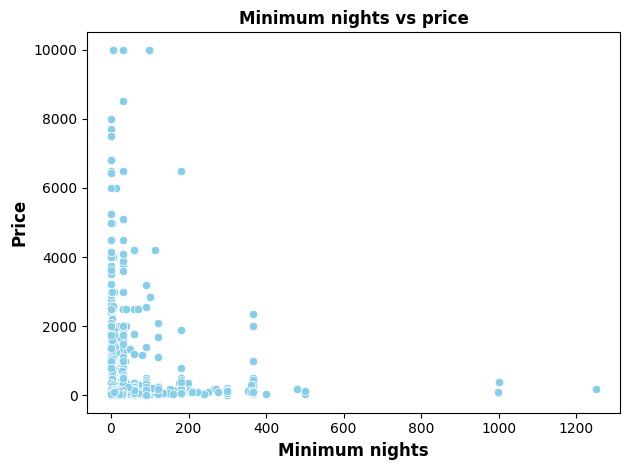

In [54]:
sns.scatterplot(data=df,x = 'minimum_nights',y='price',color='skyblue')
plt.title("Minimum nights vs price",fontweight='bold')
plt.ylabel("Price", fontsize=12,fontweight='bold')
plt.xlabel("Minimum nights", fontsize=12,fontweight='bold') 
plt.tight_layout()
plt.show()

In [55]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

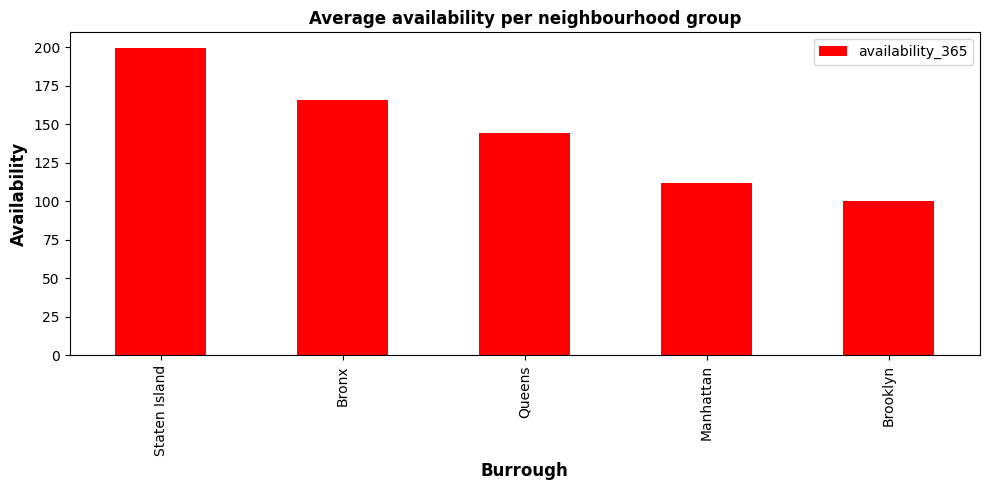

In [70]:
df[['neighbourhood_group','availability_365']].groupby('neighbourhood_group').mean().sort_values('availability_365',ascending=False).plot(kind='bar',figsize=(10,5),color='red')
plt.title("Average availability per neighbourhood group",fontweight='bold')
plt.ylabel("Availability", fontsize=12,fontweight='bold')
plt.xlabel("Burrough", fontsize=12,fontweight='bold')
plt.tight_layout()
plt.show()